In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
using CairoMakie, GLMakie

In [3]:
function tetrapart_model(var, par, t)

    E, x, u, y, ecm, p  = var;
    τ, τD, τF, τy, α, αE, αecm, αp, J, U0, I0, ΔU0, β, βecm, βp, γp, ecm0, ecm1, kecm, θecm, p0, p1, θp, kp, ythr, xthr = par;

    g = log( 1 + exp( ( (J + αE * ecm) * u * x * E + I0) / α ) );
    U = U0 + ΔU0 / ( 1 + exp( -50 * ( y - ythr ) ) );
    Hy = 1 / ( 1 + exp( -20 * ( x - xthr ) ) );
    Hecm = ecm0 - (ecm0 - ecm1) / (1 + exp( -(E - θecm) / kecm ) );
    Hp =  p0 - (p0 - p1) / (1 + exp( -(E - θp) / kp) );

    dE = (-E + α * g) / τ;
    dx = (1 - x) / τD  -u * x * E;
    du = (U - u) / τF  + U * (1 - u) * E;
    dy = (-y) / τy + β * Hy;
    decm = -( αecm + γp * p ) * ecm + βecm * Hecm;
    dp = -αp * p + βp * Hp;

    return SVector(dE, dx, du, dy, decm, dp);
end

tetrapart_model (generic function with 1 method)

In [4]:
time = 5000.0; tt = 0.0; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [5]:
# αE = 5.0;
multistab = [2.422092651924434, 0.8446031114662503, 0.6534291088738378, 0.09540062161211987, 0.0004056327238809937, 1.4805608752412292e-9];

In [6]:
τ = 0.013; τD = 0.15; τF = 1.0; τy = 1.8;   
α = 1.5; αecm = 0.001; αp = 0.01;
J = 3.07; U0 = 0.3; I0 = -1.72; ΔU0 = 0.305;
β = 0.438; βp = 0.01; βecm = 0.01; βp = 0.01;
ecm0 = 0.0; ecm1 = 1.0; kecm = 0.15; θecm = 25.6;
p0 = 0.0; p1 = 1.0; kp = 0.05; γp = 0.1; θp = 26.0; 
ythr = 0.5; xthr = 0.9;

In [7]:
u01 = multistab;
u02 = zeros(6);

In [8]:
# control parameter
αE =  1.5;
params = [τ, τD, τF, τy, α, αE, αecm, αp, J, U0, I0, ΔU0, β, βecm, βp, γp, ecm0, ecm1, kecm, θecm, p0, p1, θp, kp, ythr, xthr];
ds = CoupledODEs(tetrapart_model, u02, params, diffeq = integ_set);
tr, trange = trajectory(ds, time, Δt = tstep);

ds1 = CoupledODEs(tetrapart_model, u01, params, diffeq = integ_set);
tr1, trange1 = trajectory(ds1, time, Δt = tstep);

In [23]:
@show varinfo()

varinfo() = | name            |        size | summary                                                                                                                                                         |
|:--------------- | -----------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Base            |             | Module                                                                                                                                                          |
| Core            |             | Module                                                                                                                                                          |
| I0              |     8 bytes | Float64                                                                                                                                                         |
| J     

| name            |        size | summary                                                                                                                                                         |
|:--------------- | -----------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Base            |             | Module                                                                                                                                                          |
| Core            |             | Module                                                                                                                                                          |
| I0              |     8 bytes | Float64                                                                                                                                                         |
| J               |     8 bytes | Float64                                                                                                                                                         |
| Main            |             | Module                                                                                                                                                          |
| U0              |     8 bytes | Float64                                                                                                                                                         |
| ax              |   9.247 MiB | Axis3                                                                                                                                                           |
| axisrHz         |   5.232 MiB | Axis                                                                                                                                                            |
| disx            |     8 bytes | Int64                                                                                                                                                           |
| disy            |     8 bytes | Int64                                                                                                                                                           |
| disz            |     8 bytes | Int64                                                                                                                                                           |
| ds              |   3.003 KiB | 6-dimensional CoupledODEs                                                                                                                                       |
| ds1             |   3.003 KiB | 6-dimensional CoupledODEs                                                                                                                                       |
| ecm0            |     8 bytes | Float64                                                                                                                                                         |
| ecm1            |     8 bytes | Float64                                                                                                                                                         |
| f               |   9.247 MiB | Figure                                                                                                                                                          |
| idx             |     8 bytes | Int64                                                                                                                                                           |
| idy             |     8 bytes | Int64                                                                                                                                                           |
| idz             |     8 bytes | Int64                                                                                                                                                           |
| indexvar        |     8 bytes | Int64                                                                                                                                                           |
| integ_set       |    16 bytes | NamedTuple{(:alg, :adaptive, :dt), Tuple{Vern9{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, Bool, Float64}} |
| kecm            |     8 bytes | Float64                                                                                                                                                         |
| kp              |     8 bytes | Float64                                                                                                                                                         |
| labelsize       |     8 bytes | Int64                                                                                                                                                           |
| lb_size         |     8 bytes | Int64                                                                                                                                                           |
| multistab       |    88 bytes | 6-element Vector{Float64}                                                                                                                                       |
| p0              |     8 bytes | Float64                                                                                                                                                         |
| p1              |     8 bytes | Float64                                                                                                                                                         |
| params          |   248 bytes | 26-element Vector{Float64}                                                                                                                                      |
| pathtorepo      |    30 bytes | 22-codeunit String                                                                                                                                              |
| prot            |     8 bytes | Int64                                                                                                                                                           |
| tck_size        |     8 bytes | Int64                                                                                                                                                           |
| tend            |     8 bytes | Int64                                                                                                                                                           |
| tetrapart_model |     0 bytes | tetrapart_model (generic function with 1 method)                                                                                                                |
| tf              |     8 bytes | Int64                                                                                                                                                           |
| tickssize       |     8 bytes | Int64                                                                                                                                                           |
| time            |     8 bytes | Float64                                                                                                                                                         |
| times           |    56 bytes | 2-element Vector{Float64}                                                                                                                                       |
| tr              | 228.882 MiB | 6-dimensional StateSpaceSet{Float64} with 5000001 points                                                                                                        |
| tr1             | 228.882 MiB | 6-dimensional StateSpaceSet{Float64} with 5000001 points                                                                                                        |
| trange          |    48 bytes | 5000001-element StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}                                                        |
| trange1         |    48 bytes | 5000001-element StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}                                                        |
| ts              |     8 bytes | Int64                                                                                                                                                           |
| tstart          |     8 bytes | Int64                                                                                                                                                           |
| tstep           |     8 bytes | Float64                                                                                                                                                         |
| tt              |     8 bytes | Float64                                                                                                                                                         |
| u01             |    88 bytes | 6-element Vector{Float64}                                                                                                                                       |
| u02             |    88 bytes | 6-element Vector{Float64}                                                                                                                                       |
| username        |    12 bytes | 4-codeunit String                                                                                                                                               |
| x               |  78.164 KiB | 100×100 Matrix{Float64}                                                                                                                                         |
| xthr            |     8 bytes | Float64                                                                                                                                                         |
| ythr            |     8 bytes | Float64                                                                                                                                                         |
| ΔU0             |     8 bytes | Float64                                                                                                                                                         |
| α               |     8 bytes | Float64                                                                                                                                                         |
| αE              |     8 bytes | Float64                                                                                                                                                         |
| αecm            |     8 bytes | Float64                                                                                                                                                         |
| αp              |     8 bytes | Float64                                                                                                                                                         |
| β               |     8 bytes | Float64                                                                                                                                                         |
| βecm            |     8 bytes | Float64                                                                                                                                                         |
| βp              |     8 bytes | Float64                                                                                                                                                         |
| γp              |     8 bytes | Float64                                                                                                                                                         |
| θecm            |     8 bytes | Float64                                                                                                                                                         |
| θp              |     8 bytes | Float64                                                                                                                                                         |
| τ               |     8 bytes | Float64                                                                                                                                                         |
| τD              |     8 bytes | Float64                                                                                                                                                         |
| τF              |     8 bytes | Float64                                                                                                                                                         |
| τy              |     8 bytes | Float64                                                                                                                                                         |


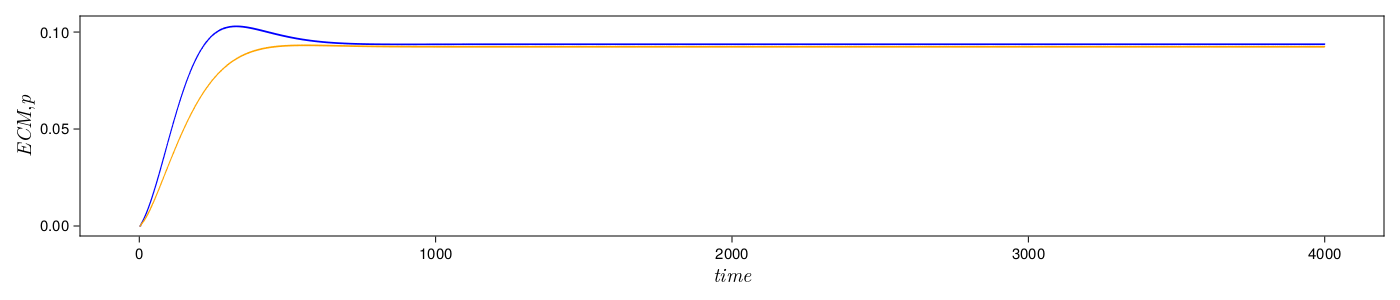

CairoMakie.Screen{IMAGE}


In [9]:
tstart, tend = 1, 4000000 # 2500000, 2700000
tickssize = 15
labelsize = 20
indexvar = 4
CairoMakie.activate!()

f= Figure(resolution = (1400, 300))
axisrHz  = Axis(f[1, 1], xlabel = L"time", ylabel = L"ECM, p",
xlabelsize = labelsize, ylabelsize = labelsize,
xticklabelsize = tickssize, yticklabelsize = tickssize,
xgridvisible = false, ygridvisible = false)
lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 5], linewidth = 1.0, color = :blue)
lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 6], linewidth = 1.0, color = :orange)
display(f)

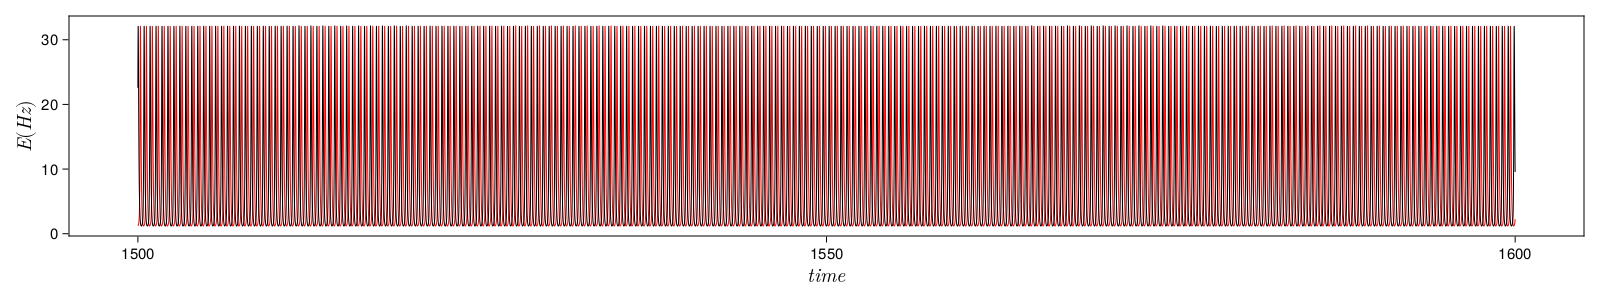

CairoMakie.Screen{IMAGE}


In [12]:
tstart, tend = 1500000, 1600000 # 2500000, 2700000
tickssize = 15
labelsize = 20
indexvar = 1
CairoMakie.activate!()

f= Figure(resolution = (1600, 300))
axisrHz  = Axis(f[1, 1], xlabel = L"time", ylabel = L"E(Hz)",
xlabelsize = labelsize, ylabelsize = labelsize,
xticklabelsize = tickssize, yticklabelsize = tickssize,
xgridvisible = false, ygridvisible = false)

lines!(axisrHz, trange1[tstart:tend], tr1[tstart:tend, indexvar], linewidth = 1.0, color = :red)
lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, indexvar], linewidth = 1.0, color = :black)

display(f)

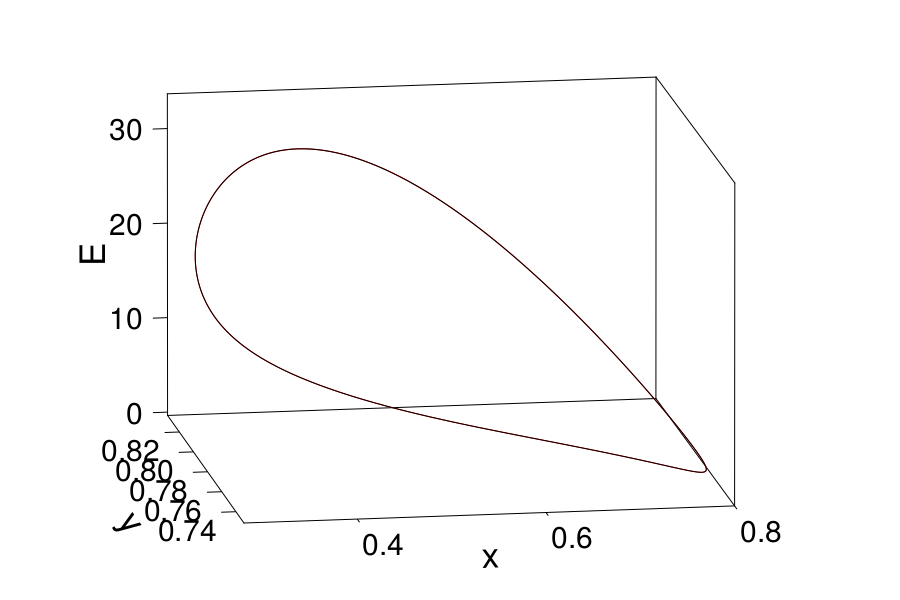

CairoMakie.Screen{IMAGE}


In [13]:
ts, tf = 1500000, 1600000 #2500000, 2900000
idx, idy, idz = 2, 3, 1
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 20;
disy = 70;
disz = 55;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = -0.55pi, elevation = 0.07pi,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(tr1[ts:tf, idx], tr1[ts:tf, idy], tr1[ts:tf, idz], linewidth = 1.0, color = :red)
lines!(tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz], linewidth = 1.0, color = :black)

display(f)

In [12]:
ts, tf = 100000, 200000

idx, idy, idz = 2, 3, 1
lb_size = 35; tck_size = 30;
dis  = 60;

GLMakie.activate!()
f = Figure(resolution = (600, 600))
ax = LScene(f[1, 1])
scale!(ax.scene, 50, 50, 1)

lines!(tr1[ts:tf, idx], tr1[ts:tf, idy], tr1[ts:tf, idz], linewidth = 1.0, color = :red)
lines!(tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz], linewidth = 1.0, color = :black)

display(GLMakie.Screen(), f)

UndefVarError: UndefVarError: `tr1` not defined